In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [2]:
# in your notebook cell
#import sys

# path relative to your notebook
#sys.path.insert(0, '../src')

# import as usual
#import functions

In [3]:
# autoreload
#%load_ext autoreload
#%autoreload 2

In [4]:
#read csv into data frame fucntion
def read_a_csv(file_path, df_name):
    """
    Read a CSV file and return a DataFrame.

    Args:
        file_path (str): Path to the CSV file.
        df_name (str): Variable name for the DataFrame.

    Returns:
        pandas.DataFrame: DataFrame containing the CSV data.
    """
    try:
        df_name = pd.read_csv(file_path)
        return df_name
    except FileNotFoundError:
        print("Error: File not found.")
        return None

In [5]:
#salaries_csv = functions.read_file("../data/ds_salaries.csv")

In [6]:
# pulls csv file from data folder to find the shape of the dataset

salaries = pd.read_csv("../data/ds_salaries.csv")
salaries.shape

(3755, 11)

In [7]:
# group the data by job title and calculate the mean salary for each group
ave_salary_by_job = salaries.groupby('job_title')['salary'].mean().head(20).loc[::-1]

print(ave_salary_by_job)

job_title
Cloud Data Architect                  250000.000000
Business Intelligence Engineer        174150.000000
Business Data Analyst                 256200.000000
Big Data Engineer                     365909.090909
Big Data Architect                    124999.500000
BI Developer                          129846.153846
BI Data Engineer                       60000.000000
BI Data Analyst                       836644.800000
BI Analyst                            104888.888889
Azure Data Engineer                   100000.000000
Autonomous Vehicle Technician          26277.500000
Applied Scientist                     190264.482759
Applied Machine Learning Scientist    306233.333333
Applied Machine Learning Engineer      97500.000000
Applied Data Scientist                283200.000000
Analytics Engineer                    151352.621359
AI Scientist                          275312.500000
AI Programmer                          55000.000000
AI Developer                          137181.818182
3D

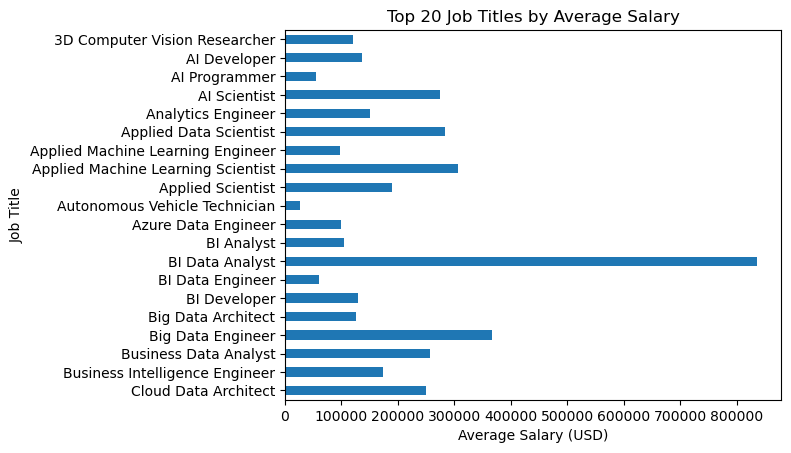

In [8]:

ave_salary_by_job.plot.barh()
# Add labels and title
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.title('Top 20 Job Titles by Average Salary')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Top 20 Job Titles by Average Salary')

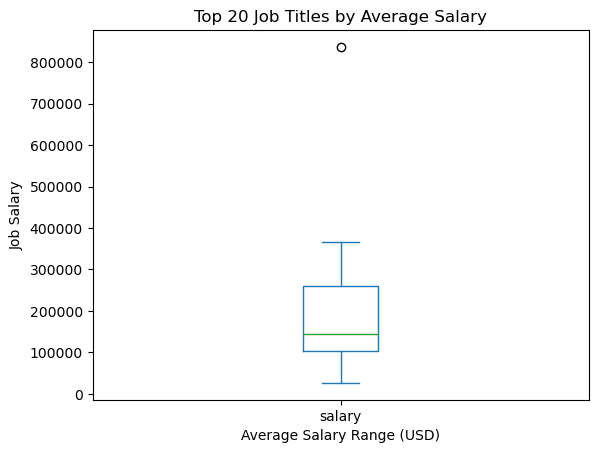

In [9]:
ave_salary_by_job.plot.box()
plt.xlabel('Average Salary Range (USD)')
plt.ylabel('Job Salary')
plt.title('Top 20 Job Titles by Average Salary')

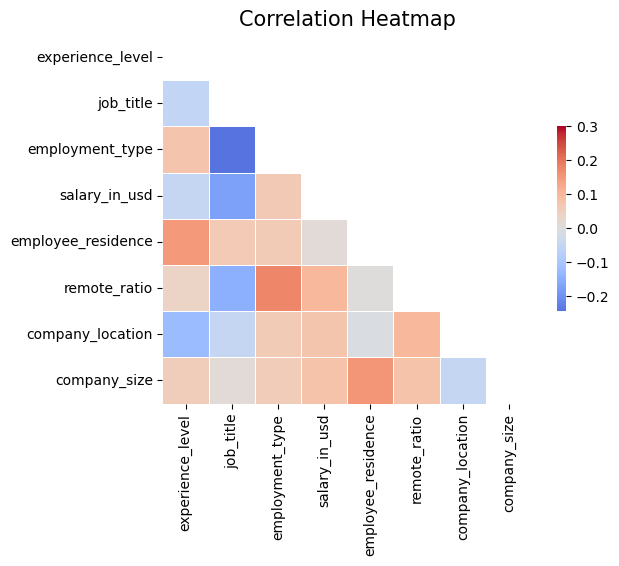

In [10]:

# Create a dataset
df = pd.DataFrame(np.random.random((100,8)), 
    columns=['experience_level',
             'job_title', 
             'employment_type',
             'salary_in_usd', 
             'employee_residence', 
             'remote_ratio',
             'company_location',
             'company_size'])

# Calculate correlation between each pair of variable
corr_matrix=df.corr()
 
# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.title('Correlation Heatmap', fontsize = 15) # title with fontsize 20

plt.show()

In [71]:
#uses ds to examine 'job_title' column
top_job_titles = salaries['job_title'].value_counts().head(20).loc[::-1]
top_job_titles

Data Specialist                 14
Business Data Analyst           15
BI Data Analyst                 15
AI Scientist                    16
Computer Vision Engineer        18
Data Analytics Manager          22
Data Science Consultant         24
Machine Learning Scientist      26
Data Manager                    29
ML Engineer                     34
Research Engineer               37
Applied Scientist               58
Data Science Manager            58
Research Scientist              82
Data Architect                 101
Analytics Engineer             103
Machine Learning Engineer      289
Data Analyst                   612
Data Scientist                 840
Data Engineer                 1040
Name: job_title, dtype: int64

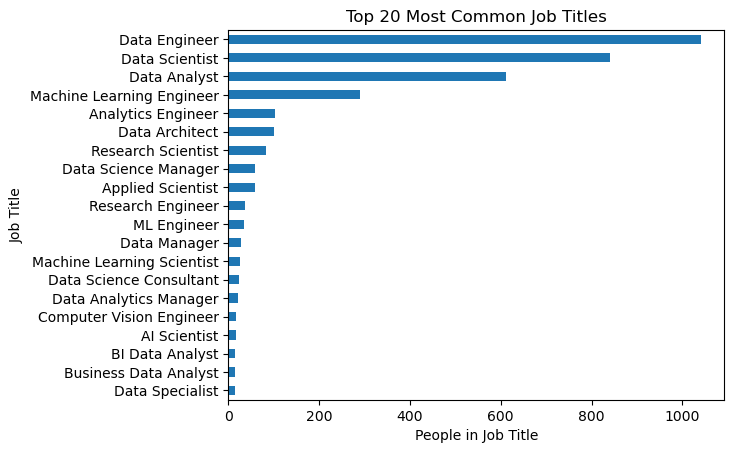

In [130]:
#horizontal bar plot of top_job_titles in decending order
top_job_titles.plot.barh()
# Add labels and title
plt.xlabel('People in Job Title')
plt.ylabel('Job Title')
plt.title('Top 20 Most Common Job Titles')

# Show the plot
plt.show()

In [197]:
top_salary_in_usd = salaries['salary_in_usd'].value_counts().head(20).loc[::-1]
top_salary_in_usd

185900    32
129300    32
250000    33
95000     33
75000     34
80000     36
90000     36
110000    45
170000    45
180000    47
175000    51
145000    54
135000    63
140000    63
200000    64
130000    82
160000    84
120000    91
150000    98
100000    99
Name: salary_in_usd, dtype: int64

In [192]:
#The 20 top salaries in ascending order
#top_salary_in_usd = salaries['salary_in_usd'].value_counts().head(20).iloc[::-1].sort_values(ascending=False)

#top_salary_in_usd

Text(0.5, 1.0, 'Top 20 Most Common Salaries')

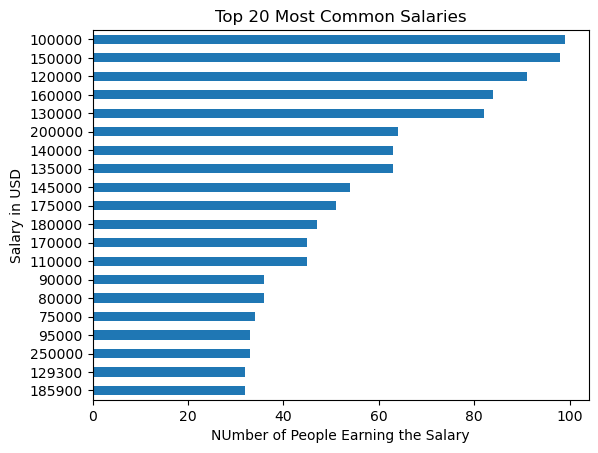

In [198]:
# hbar of top salaries. Need to arrange salaries in ascending order, 
# keep x-axis as is
top_salary_in_usd.plot.barh()
# Add labels and title
plt.xlabel('NUmber of People Earning the Salary')
plt.ylabel('Salary in USD')
plt.title('Top 20 Most Common Salaries')


In [203]:
company_location = salaries['company_location'].value_counts().head(5).iloc[::-1]
company_location

IN      58
ES      77
CA      87
GB     172
US    3040
Name: company_location, dtype: int64

Text(0.5, 1.0, 'Company Locations')

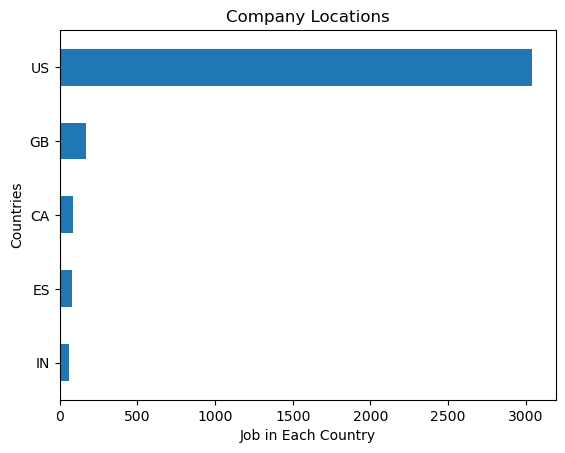

In [205]:
company_location.plot.barh()

plt.xlabel('Job in Each Country')
plt.ylabel('Countries')
plt.title('Company Locations')

In [214]:

# Filter the data to only include salaries less than or equal to $250,000
salaries = salaries[salaries['salary_in_usd'] <= 250000]

# Quick Box Plot to add perspective to previous data
all_ave_salary = salaries.groupby('job_title')['salary'].median().head(28).loc[::-1]
all_ave_salary.plot.box()

# Add Title and Labels to x axis and y axis
plt.xlabel('Average Salary Range (USD)')
plt.ylabel('Job Salary')
plt.title('Top Job Titles by Average Salary')

# Show the plot
plt.show()

KeyError: 'Column not found: salary'

In [213]:
salaries = df
# Filter the data to only include salaries less than or equal to $250,000
salaries = salaries[salaries['salary_in_usd'] <= 250000]

# Quick Box Plot to add perspective to previous data
all_ave_salary = salaries.groupby('job_title')['salary'].median().head(28).loc[::-1]
all_ave_salary.plot.box()

# Add Title and Labels to x axis and y axis
plt.xlabel('Average Salary Range (USD)')
plt.ylabel('Job Salary')
plt.title('Top Job Titles by Average Salary')

# Show the plot
plt.show()

KeyError: 'Column not found: salary'